## Analysis of mice tumor data

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_excel('clustering value_new.xlsx')
df=df.iloc[:,:6]

#### This is how our data look

In [3]:
df.rename(columns={"Respone/stable/non-Response": "response", "Elastic Modulus SWE (kPa)": "swe","Perfused Area":'area',"Type of Cancer":'cancer'},inplace=True)
df.head()

,name,response,swe,area,Cell lines,cancer
0,4T1 LOOK DAY29_1C1_1A_b_cropped_square.tif,1,34.641412,0.624986,4T1,Breast
1,4T1 LOOK DAY29_1C1_1A_c_cropped_square.tif,1,23.514638,0.624986,4T1,Breast
2,4T1 LOOK DAY29_1C1_1A_cropped_square.tif,1,20.450058,0.624986,4T1,Breast
3,4T1 LOOK DAY29_1C1_1D_c_cropped_square.tif,1,29.826093,0.793898,4T1,Breast
4,4T1 LOOK DAY29_1C1_1D_cropped_square.tif,1,22.371027,0.793898,4T1,Breast


In [4]:
df.describe()

,response,swe,area
count,1365.000000,1365.000000,1157.000000
mean,1.956044,39.719810,0.569521
std,0.830752,12.949924,0.168682
min,1.000000,15.000710,0.255284
25%,1.000000,28.774137,0.426063
50%,2.000000,39.517520,0.547296
75%,3.000000,49.791293,0.708252
max,3.000000,63.485778,0.933730


### Here we can see that our data are perfectly clustered in three clusters (Response, Stable and non-Response) having as input the average tumor elastic modulus and the normalized perfused area

Text(0.5, 0, 'Perfused area')

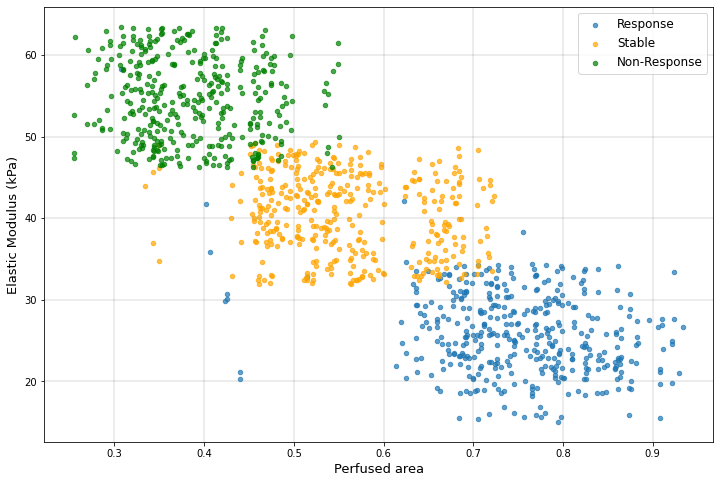

In [5]:
ax1=df[df['response']==1].plot(kind='scatter',x='area',y='swe',alpha=0.7,figsize=(12,8))
df[df['response']==2].plot(kind='scatter',x='area',y='swe',color='orange',alpha=0.7,ax=ax1)
df[df['response']==3].plot(kind='scatter',x='area',y='swe',color='green',alpha=0.7,ax=ax1)
ax1.grid(color='grey', linewidth=0.3)
ax1.legend(['Response','Stable','Non-Response'],loc='upper right',fontsize=12)
ax1.set_ylabel('Elastic Modulus (kPa)',fontsize=13)
ax1.set_xlabel('Perfused area',fontsize=13)

Text(0.5, 0, 'Perfused area')

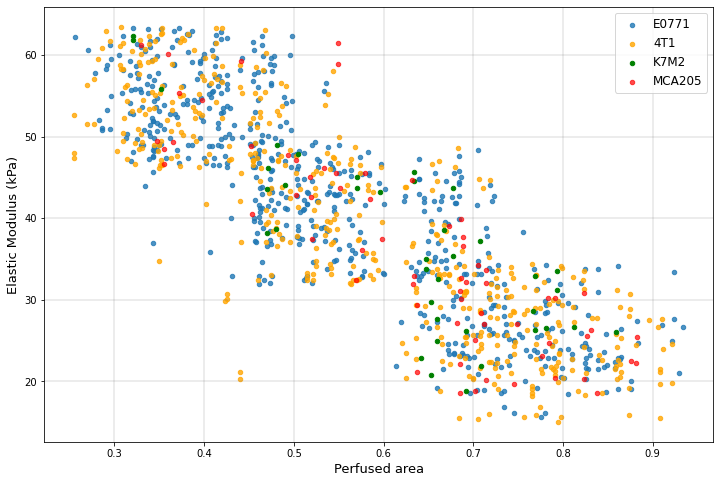

In [6]:
ax1=df[df['Cell lines']=='E0771'].plot(kind='scatter',x='area',y='swe',alpha=0.8,figsize=(12,8))
df[df['Cell lines']=='4T1'].plot(kind='scatter',x='area',y='swe',color='orange',alpha=0.8,ax=ax1)
df[df['Cell lines']=='K7M2'].plot(kind='scatter',x='area',y='swe',color='green',alpha=1,ax=ax1)
df[df['Cell lines']=='MCA205'].plot(kind='scatter',x='area',y='swe',color='red',alpha=0.7,ax=ax1)
ax1.grid(color='grey', linewidth=0.3)
ax1.legend(['E0771','4T1','K7M2','MCA205'],loc='upper right',fontsize=12)
ax1.set_ylabel('Elastic Modulus (kPa)',fontsize=13)
ax1.set_xlabel('Perfused area',fontsize=13)

In [7]:
df['Cell lines'].unique()

array(['4T1', 'E0771', 'K7M2', 'MCA205'], dtype=object)

In [8]:
df['area'].isna().sum()

208

#### We have way more breast cancers (cell lines E0771 & 4T1) compared to sarcoma cancer (MCA205 & K7M2)

In [9]:
df['Cell lines'].value_counts()

E0771     703
4T1       547
MCA205     76
K7M2       39
Name: Cell lines, dtype: int64

In [10]:
df['cancer'].value_counts()

Breast     1250
Sarcoma     115
Name: cancer, dtype: int64

### Next two figures are the three clusters again seperated for each cancer line and cancer respectively

Text(0.5, 1.0, 'MCA205')

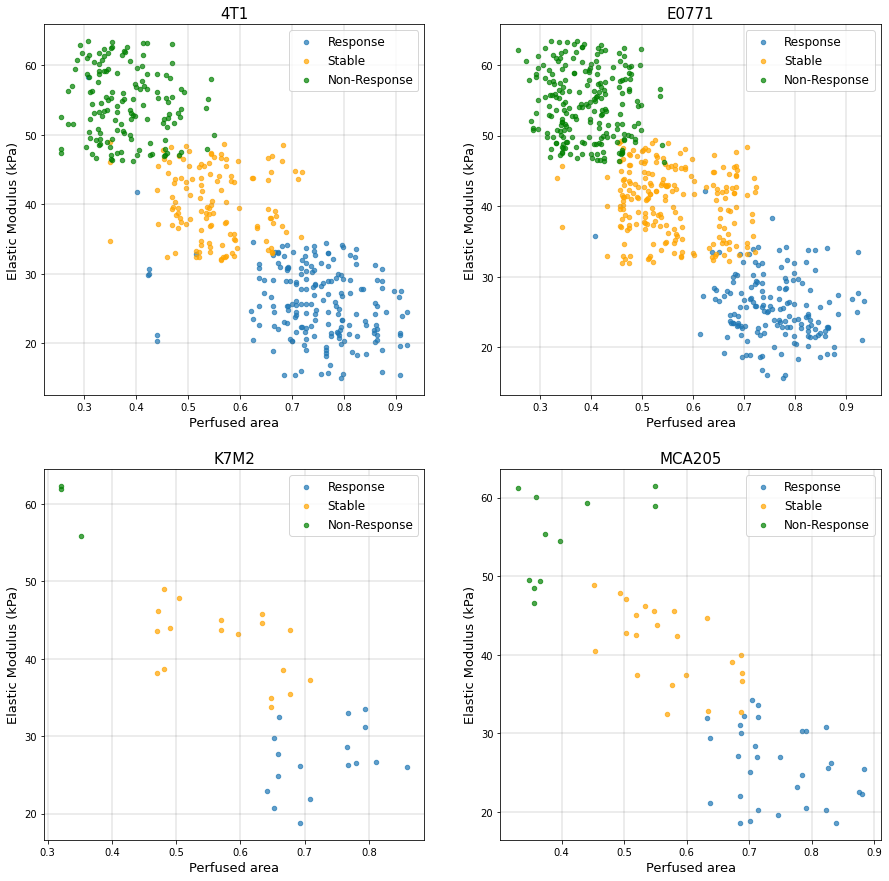

In [11]:
fig=plt.figure(figsize=(15,15))

ax1=fig.add_subplot(2,2,1)
ax1=df[(df['response']==1)&(df['Cell lines']=='4T1')].plot(kind='scatter',x='area',y='swe',alpha=0.7,ax=ax1)
df[(df['response']==2)&(df['Cell lines']=='4T1')].plot(kind='scatter',x='area',y='swe',color='orange',alpha=0.7,ax=ax1)
df[(df['response']==3)&(df['Cell lines']=='4T1')].plot(kind='scatter',x='area',y='swe',color='green',alpha=0.7,ax=ax1)
ax1.grid(color='grey', linewidth=0.3)
ax1.legend(['Response','Stable','Non-Response'],loc='upper right',fontsize=12)
ax1.set_ylabel('Elastic Modulus (kPa)',fontsize=13)
ax1.set_xlabel('Perfused area',fontsize=13)
ax1.set_title('4T1',fontsize=15)

ax2=fig.add_subplot(2,2,2)
ax2=df[(df['response']==1)&(df['Cell lines']=='E0771')].plot(kind='scatter',x='area',y='swe',alpha=0.7,ax=ax2)
df[(df['response']==2)&(df['Cell lines']=='E0771')].plot(kind='scatter',x='area',y='swe',color='orange',alpha=0.7,ax=ax2)
df[(df['response']==3)&(df['Cell lines']=='E0771')].plot(kind='scatter',x='area',y='swe',color='green',alpha=0.7,ax=ax2)
ax2.grid(color='grey', linewidth=0.3)
ax2.legend(['Response','Stable','Non-Response'],loc='upper right',fontsize=12)
ax2.set_ylabel('Elastic Modulus (kPa)',fontsize=13)
ax2.set_xlabel('Perfused area',fontsize=13)
ax2.set_title('E0771',fontsize=15)

ax3=fig.add_subplot(2,2,3)
ax3=df[(df['response']==1)&(df['Cell lines']=='K7M2')].plot(kind='scatter',x='area',y='swe',alpha=0.7,ax=ax3)
df[(df['response']==2)&(df['Cell lines']=='K7M2')].plot(kind='scatter',x='area',y='swe',color='orange',alpha=0.7,ax=ax3)
df[(df['response']==3)&(df['Cell lines']=='K7M2')].plot(kind='scatter',x='area',y='swe',color='green',alpha=0.7,ax=ax3)
ax3.grid(color='grey', linewidth=0.3)
ax3.legend(['Response','Stable','Non-Response'],loc='upper right',fontsize=12)
ax3.set_ylabel('Elastic Modulus (kPa)',fontsize=13)
ax3.set_xlabel('Perfused area',fontsize=13)
ax3.set_title('K7M2',fontsize=15)

ax4=fig.add_subplot(2,2,4)
ax4=df[(df['response']==1)&(df['Cell lines']=='MCA205')].plot(kind='scatter',x='area',y='swe',alpha=0.7,ax=ax4)
df[(df['response']==2)&(df['Cell lines']=='MCA205')].plot(kind='scatter',x='area',y='swe',color='orange',alpha=0.7,ax=ax4)
df[(df['response']==3)&(df['Cell lines']=='MCA205')].plot(kind='scatter',x='area',y='swe',color='green',alpha=0.7,ax=ax4)
ax4.grid(color='grey', linewidth=0.3)
ax4.legend(['Response','Stable','Non-Response'],loc='upper right',fontsize=12)
ax4.set_ylabel('Elastic Modulus (kPa)',fontsize=13)
ax4.set_xlabel('Perfused area',fontsize=13)
ax4.set_title('MCA205',fontsize=15)

Text(0.5, 1.0, 'Sarcoma')

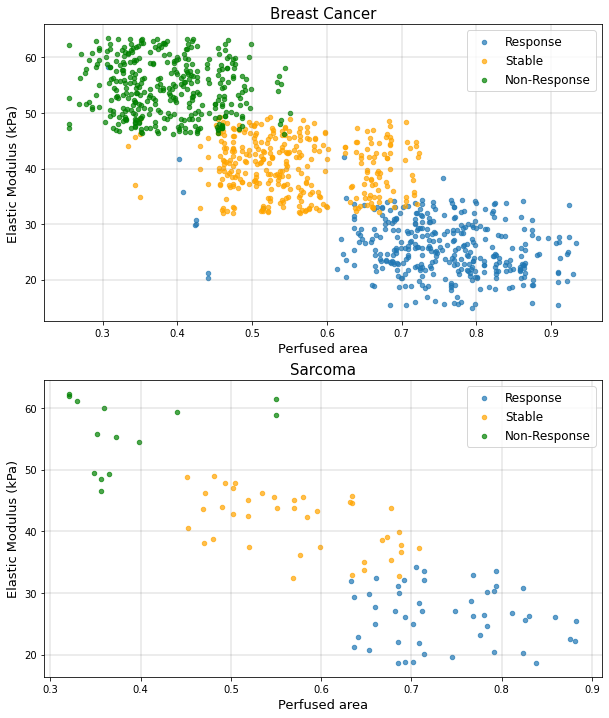

In [12]:
fig=plt.figure(figsize=(10,12))

ax1=fig.add_subplot(2,1,1)
ax1=df[(df['response']==1)&(df['cancer']=='Breast')].plot(kind='scatter',x='area',y='swe',alpha=0.7,ax=ax1)
df[(df['response']==2)&(df['cancer']=='Breast')].plot(kind='scatter',x='area',y='swe',color='orange',alpha=0.7,ax=ax1)
df[(df['response']==3)&(df['cancer']=='Breast')].plot(kind='scatter',x='area',y='swe',color='green',alpha=0.7,ax=ax1)
ax1.grid(color='grey', linewidth=0.3)
ax1.legend(['Response','Stable','Non-Response'],loc='upper right',fontsize=12)
ax1.set_ylabel('Elastic Modulus (kPa)',fontsize=13)
ax1.set_xlabel('Perfused area',fontsize=13)
ax1.set_title('Breast Cancer',fontsize=15)

ax2=fig.add_subplot(2,1,2)
ax2=df[(df['response']==1)&(df['cancer']=='Sarcoma')].plot(kind='scatter',x='area',y='swe',alpha=0.7,ax=ax2)
df[(df['response']==2)&(df['cancer']=='Sarcoma')].plot(kind='scatter',x='area',y='swe',color='orange',alpha=0.7,ax=ax2)
df[(df['response']==3)&(df['cancer']=='Sarcoma')].plot(kind='scatter',x='area',y='swe',color='green',alpha=0.7,ax=ax2)
ax2.grid(color='grey', linewidth=0.3)
ax2.legend(['Response','Stable','Non-Response'],loc='upper right',fontsize=12)
ax2.set_ylabel('Elastic Modulus (kPa)',fontsize=13)
ax2.set_xlabel('Perfused area',fontsize=13)
ax2.set_title('Sarcoma',fontsize=15)


### It seems that by using both the Elastic Modulus and the Perfused Area of the tumor, our data are already well classified into Response, Stable and non-Response

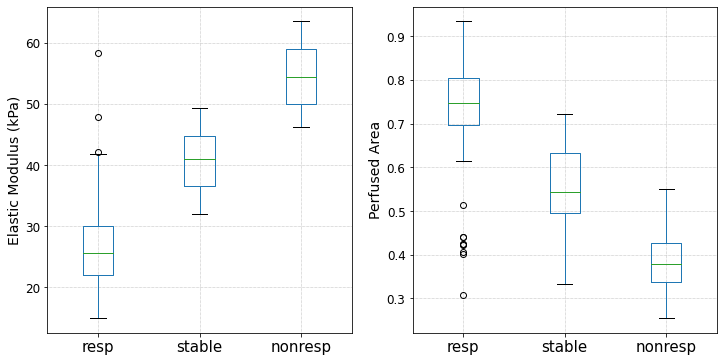

In [13]:
df1=pd.DataFrame({'resp':df['swe'][df['response']==1],'stable':df['swe'][df['response']==2],'nonresp':df['swe'][df['response']==3]})
df2=pd.DataFrame({'resp':df['area'][df['response']==1],'stable':df['area'][df['response']==2],'nonresp':df['area'][df['response']==3]})

fig=plt.figure(figsize=(12,6))

ax=fig.add_subplot(1,2,1)
ax=df1.plot(kind='box',ax=ax)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_ylabel('Elastic Modulus (kPa)',fontsize=14)
ax.tick_params(axis='y', which='major', labelsize=12)
ax.tick_params(axis='x', which='major', labelsize=15)

ax2=fig.add_subplot(1,2,2)
ax2=df2.plot(kind='box',ax=ax2)
ax2.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax2.set_ylabel('Perfused Area',fontsize=14)
ax2.tick_params(axis='y', which='major', labelsize=12)
ax2.tick_params(axis='x', which='major', labelsize=15)

plt.show()

#### In case we create a model for prognosis to predict the reponse to the therapy using elastic modulus and perfused area, we will get good results. Let's find out

In [14]:
#remove nans
df.dropna(axis=0,inplace=True)
df.describe()

,response,swe,area
count,1157.000000,1157.000000,1157.000000
mean,1.973207,39.940202,0.569521
std,0.818350,12.733734,0.168682
min,1.000000,15.000710,0.255284
25%,1.000000,29.114937,0.426063
50%,2.000000,40.114108,0.547296
75%,3.000000,49.723785,0.708252
max,3.000000,63.485778,0.933730


### Shallow Machine Leaning models to assess prediction accuracy of classification models.

##### Preproccessing 

In [15]:
df[['4T1','E0771','K7M2','MCA205']]=pd.get_dummies(df['Cell lines'])

In [16]:
X = np.asarray(df[['swe','area','4T1','E0771','K7M2','MCA205']])
#X = np.asarray(df[['swe','area']])
y = np.asarray(df['response'].astype('string'))
X[0:2]

array([[34.64141156,  0.62498627,  1.        ,  0.        ,  0.        ,
         0.        ],
       [23.51463809,  0.62498627,  1.        ,  0.        ,  0.        ,
         0.        ]])

In [17]:
from sklearn import preprocessing
X[:,:2] = preprocessing.StandardScaler().fit(X[:,:2]).transform(X[:,:2])
X[0:2]

array([[-0.41630225,  0.32895552,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-1.29048301,  0.32895552,  1.        ,  0.        ,  0.        ,
         0.        ]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=8)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (925, 6) (925,)
Test set: (232, 6) (232,)


#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,y_train)
LR

LogisticRegression()

In [20]:
yhat = LR.predict(X_test)

In [21]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:2]

array([[6.75016210e-01, 3.24969195e-01, 1.45952825e-05],
       [3.54687849e-09, 2.49701730e-03, 9.97502979e-01]])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,yhat)

0.9568965517241379

#### XG Boost

In [23]:
import xgboost
#Training Dataset
model=xgboost.XGBClassifier(eta=0.3,max_depth=6)
model.fit(X_train,y_train)
yhat=model.predict(X_test)

c:\users\demetris englezos\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:02:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [24]:
acc=accuracy_score(y_test,yhat)
acc

0.9741379310344828

In [25]:
len(yhat)

232

In [26]:
len(yhat)*acc

226.0

##### XG Boost model interpretability 
As expected elastic modulus and normalized perfused area are the most important features for the predictions. K7M2 and MCA205 has no significant value on predicting the class which makes sense considering their limited number of observations, especially in the test set. 

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


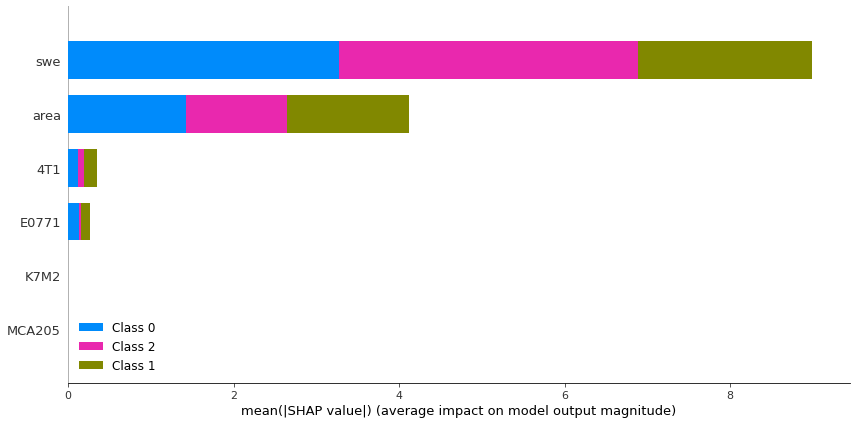

In [27]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, max_display=X_test.shape[1],plot_size=(12,6),feature_names=df[['swe','area','4T1','E0771','K7M2','MCA205']].columns)

#### We only have 6 missclassifications

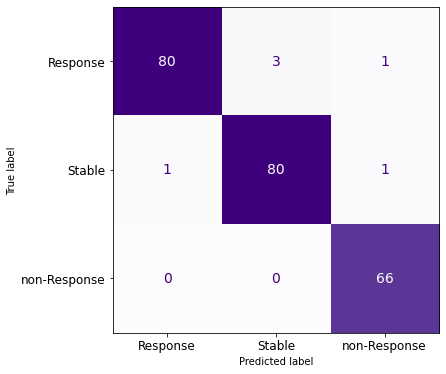

In [53]:
from sklearn.metrics import roc_curve,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay
cf_matrix = confusion_matrix(y_test,yhat)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = ['Response','Stable','non-Response'])
fig,ax = plt.subplots(figsize=(6,6))
ax.tick_params(axis='both', which='major', labelsize=12)  # Adjust the font size as needed
cm_display.plot(colorbar=False,cmap='Purples',ax=ax)
text = ax.texts

# Set the font size for each text artist (number in the matrix)
for t in text:
    t.set_fontsize(14)  # Adjust the font size as needed

plt.show()